In [1]:
from bs4 import BeautifulSoup as bs
import json
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import requests
from iWindsurfScraper import iWindsurfScraper

%load_ext autoreload
%autoreload 2

# import matplotlib as mpl
# mpl.use("Agg")

In [2]:
plt.ioff()

In [10]:
plt.ion()

In [11]:
plt.isinteractive()

True

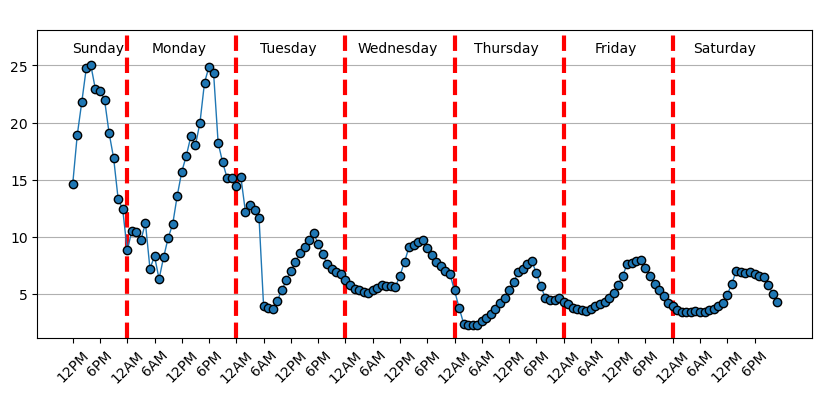

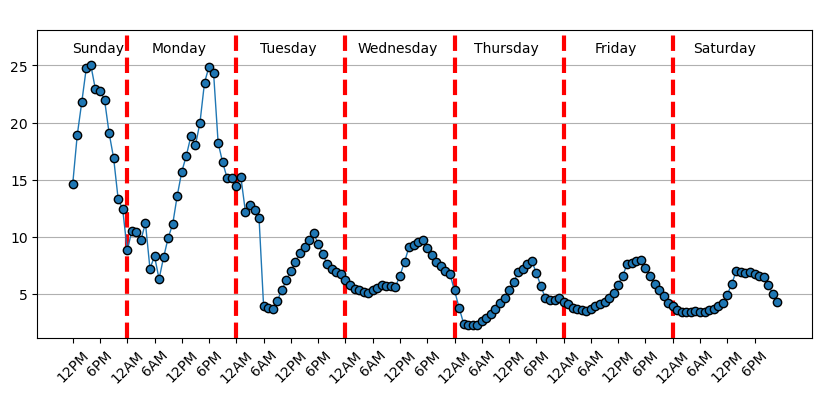

In [15]:
iw = iWindsurfScraper()
df_wind = iw.GetData('3RD AVE CHANNEL')
iw.PlotWindForecast('3RD AVE CHANNEL')
plt.show()

In [ ]:
# plt.plot([1,2,3], [4,5,6])


In [ ]:
df_wind
if df_wind['Weekday'].values[0] == df_wind['Weekday'].values[-1]:
    check1 = df_wind['Weekday'] == df_wind['Weekday'].values[-1]
    check2 = df_wind['Weekday'].index > df_wind.shape[0] // 2
    df_wind = df_wind[~(check1 & check2)]
df_wind

In [ ]:
plt.figure(figsize=(10,4))

weekdays = df_wind['Weekday'].values
_, unique_idxs = np.unique(weekdays, return_index=True)
unique_idxs = np.sort(unique_idxs)
unique_days = weekdays[unique_idxs]

# Plot lines seperating days    
df_temp = df_wind[df_wind['Hour'] == '12AM']
for x_temp in df_temp.index:
    plt.axvline(x_temp, markersize=0, linewidth=3, color='red', linestyle='--')

# Add weekday text  
max_speed = np.max(df_wind['Wind Speed [mph]'].values)
df_temp = df_wind[df_wind['Hour'] == '12PM']
for x_temp, weekday in zip(df_temp.index, df_temp['Weekday'].values):
    # Add Weekday Labels
    plt.gca().text(x=x_temp, y=max_speed - 1.5,
                   s=weekday, fontsize=20, ha='center', va='center')

x_labels = df_wind['Hour'].values
x = np.arange(0, len(x_labels), 1)
y = df_wind['Wind Speed [mph]'].values
plt.plot(x, y, markersize=6, linewidth=1, markeredgecolor='black', marker='o', color='C0')
    
# plt.axhline(16, markersize=0, linewidth=1, color='red', linestyle='--')
plt.grid(True)
plt.xlabel('Hour', fontsize=16)
plt.ylabel('Wind Speed [mph]', fontsize=16)
plt.title('Wind Speed @ %s' % location, fontsize=18)

_ = plt.xticks(ticks=x[::2], labels=x_labels[::2], rotation=45, fontsize=12)

In [ ]:
%debug

In [ ]:
if location.upper() in list(self.LOCATION_LOOKUP):
    location_key = self.LOCATION_LOOKUP[location.upper()]

df_surf = self.data[location_key]

days = 6
points_per_day = 4

weekdays = df_surf['Weekday'].values
wave_max_height = df_surf['Wave Max Height [ft]'].values
wave_avg_height = df_surf['Wave Avg Height [ft]'].values

diff = wave_max_height - wave_avg_height

x = np.arange(0, len(weekdays), 1)
x_labels = ['12AM', '6AM', '12PM', '6PM'] * days

plt.figure(figsize=(15, 7))

for i in range(days):
    x_data = x[i * points_per_day:(i + 1) * points_per_day]
    y_data = wave_avg_height[i * points_per_day:(i + 1) * points_per_day]
    diff_data = diff[i * points_per_day:(i + 1) * points_per_day]

    rects = plt.bar(x=x_data, height=y_data, width=1, yerr=diff_data,
                    edgecolor='black')

    # Draw red vertical lines
    if i != days - 1:
        plt.axvline(x_data[-1] + 0.5, color='red', markersize=0, linestyle='--',
                    linewidth=3)

    # Annotate Bars
    for rect in rects:
        height = rect.get_height()
        plt.gca().annotate('%.1f' % height,
                           xy=(rect.get_x() + rect.get_width() / 2, height + 1),
                           xytext=(0, 3),  # 3 points vertical offset
                           textcoords="offset points",
                           ha='center', va='bottom', fontsize=12)

    # Add Weekday Labels
    plt.gca().text(x=np.mean(x_data), y=np.max(wave_max_height) + 1.5,
                   s=weekdays[i * 4], fontsize=20, ha='center', va='center')

plt.gca().yaxis.grid(True)
_ = plt.xticks(ticks=x, labels=x_labels, rotation=30, fontsize=14)
_ = plt.yticks(fontsize=14)
plt.xlabel('Time [HR]', fontsize=18)
plt.ylabel('Wave Size [ft]', fontsize=18)
plt.title('Wave Size over 6 day Period at %s' % location, fontsize=28)

(min_y, max_y) = plt.ylim()
plt.ylim([min_y, max_y + 2])

In [ ]:
height